# WMS Analysis Example

This example extracts a Sea Surface Temperature map from an NEII OGC Web Map Service. The map is then processed using matplotlib and numpy to plot a temperature distribution graph.

Disclaimer: This is not a rigorous scientific analysis but is inteneded to demonstrate interaction with a Web Map Service.

## Step 1: Import the OWSLib WebMapService class and connect to the WMS

In [79]:
from owslib.wms import WebMapService

In [80]:
wms=WebMapService('http://ereeftds.bom.gov.au/ereefs/tds/wms/ereefs/RT2_gridAgg_P1D_SST')

## Step 2: Investigate the layers of the WMS

In [3]:
list(wms.contents) # lists the layers available

['sst1day',
 'ssta1day',
 'ssta_leg1day',
 'sst_mosaic',
 'ssta_mosaic_imos',
 'ssta_mosaic_leg']

In [4]:
bbox=wms['sst_mosaic'].boundingBox # finds the extent/boundingbox for the 'sst_mosaic' layer

In [5]:
bbox

(142.00999450683594,
 -25.489999771118164,
 155.99000549316406,
 -9.510000228881836,
 'EPSG:4326')

In [6]:
times=wms['sst_mosaic'].timepositions # finds the available time points for the 'sst_mosaic' layer. 

In [7]:
len(times)

5683

In [8]:
times[-10:] # display the ten latest time stamps.

['2017-10-13T15:20:00.000Z',
 '2017-10-14T15:20:00.000Z',
 '2017-10-15T15:20:00.000Z',
 '2017-10-16T15:20:00.000Z',
 '2017-10-17T15:20:00.000Z',
 '2017-10-18T15:20:00.000Z',
 '2017-10-19T15:20:00.000Z',
 '2017-10-20T15:20:00.000Z',
 '2017-10-21T15:20:00.000Z',
 '2017-10-22T15:20:00.000Z']

## Step 3: Make a GetMap request and view the response

In [9]:
img = wms.getmap(layers = ['sst_mosaic'],
                 srs='EPSG:4326',
                 bbox=(142.00999450683594,-25.489999771118164,155.99000549316406,-9.510000228881836),
                 size=(500,500),
                 format='image/png',time='2017-10-17T15:20:00.000Z',style='boxfill/occam',
                transparent = True)

In [10]:
out=open('sst_map.png', 'wb')

In [11]:
out.write(img.read())

57658

In [12]:
from IPython.display import Image

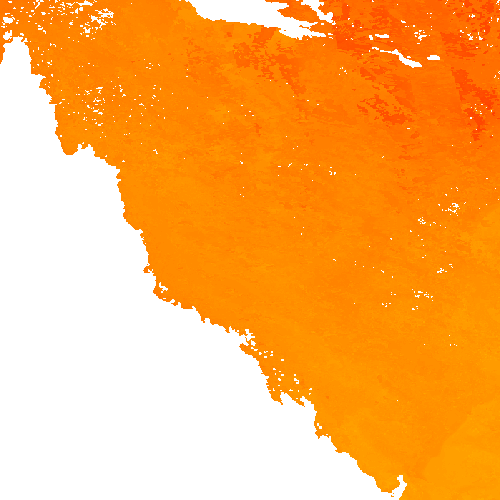

In [13]:
Image('sst_map.png')

The main problem with this map is that the colours have all fallen within the orange-red part of the colour scale so it's hard to interpret visually. Using Matplotlib we can change this.

## Step 4: Use MatPlotLib to vary the image properties

In [44]:
%matplotlib inline  #use the inline matplotlib renderer 

In [45]:
import matplotlib.pyplot as plt #import the plotting library

In [46]:
import matplotlib.image as mpimg #and the image library

In [127]:
sst_img=mpimg.imread('sst_map.png') #read the image

In [87]:
sst_img.shape #look at the dimensions of the image - it has 4 layers

(500, 500, 4)

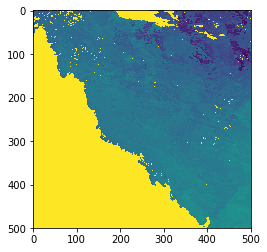

In [126]:
plt.imshow(sst_img[:,:,1])# layer '1' contains the data values

In [108]:
import numpy.ma as ma

In [111]:
sst_data=sst_img[:,:,1]

In [112]:
sst_data

array([[ 0.46666667,  0.46666667,  0.46666667, ...,  0.40392157,
         1.        ,  1.        ],
       [ 0.46666667,  0.46666667,  0.46666667, ...,  1.        ,
         1.        ,  0.40392157],
       [ 0.46666667,  0.46666667,  0.46666667, ...,  1.        ,
         1.        ,  0.41960785],
       ..., 
       [ 1.        ,  1.        ,  1.        , ...,  0.62352943,
         0.62352943,  0.62352943],
       [ 1.        ,  1.        ,  1.        , ...,  0.62352943,
         0.62352943,  0.62352943],
       [ 1.        ,  1.        ,  1.        , ...,  0.60784316,
         0.60784316,  0.62352943]], dtype=float32)

In [115]:
sst_data=ma.masked_where(sst_data>=1, sst_data)

In [116]:
sst_data

masked_array(data =
 [[0.46666666865348816 0.46666666865348816 0.46666666865348816 ...,
  0.40392157435417175 -- --]
 [0.46666666865348816 0.46666666865348816 0.46666666865348816 ..., -- --
  0.40392157435417175]
 [0.46666666865348816 0.46666666865348816 0.46666666865348816 ..., -- --
  0.41960784792900085]
 ..., 
 [-- -- -- ..., 0.6235294342041016 0.6235294342041016 0.6235294342041016]
 [-- -- -- ..., 0.6235294342041016 0.6235294342041016 0.6235294342041016]
 [-- -- -- ..., 0.6078431606292725 0.6078431606292725 0.6235294342041016]],
             mask =
 [[False False False ..., False  True  True]
 [False False False ...,  True  True False]
 [False False False ...,  True  True False]
 ..., 
 [ True  True  True ..., False False False]
 [ True  True  True ..., False False False]
 [ True  True  True ..., False False False]],
       fill_value = 1e+20)

Now the data can be plotted with a better colour map.

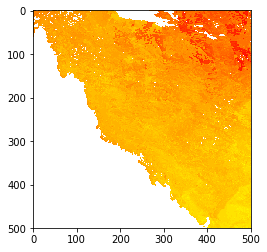

In [124]:
plt.imshow(sst_data, cmap='autumn')

(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+01,   1.05300000e+03,
          2.80900000e+03,   3.31600000e+03,   1.07460000e+04,
          2.86950000e+04,   6.17550000e+04,   4.44600000e+04,
          8.96700000e+03,   6.40000000e+01,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   8.81250000e+04]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ]),
 <a list of 20 Patch objects>)

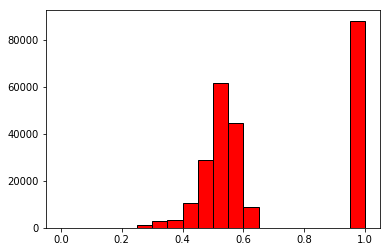

In [119]:
plt.hist(sst_data.ravel(), facecolor='red', edgecolor='black', bins=20, range=(0.00,1.00))

The plot is showing the values in the image which range between 0.0 and 1.0. To understand how these might correspond to the underlying SST data we need to refer to the map legend.

In [54]:
legendURL=wms['sst_mosaic'].styles['boxfill/occam']['legend']

In [55]:
Image(url=legendURL)

In [56]:
np.amin(sst_data), np.amax(sst_data)

(0.24705882, 1.0)

In [57]:
scaled_data=sst_data*50

In [63]:
fig=plt.Figure()

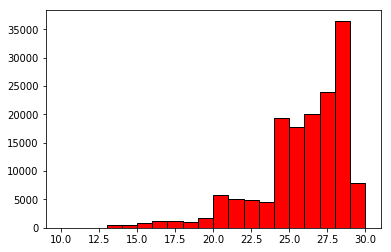

In [64]:
sstplot=plt.hist(scaled_data.ravel(),bins=20, range=(10,30), facecolor='red', edgecolor='black')

(array([  0.00000000e+00,   0.00000000e+00,   1.00000000e+01,
          4.77000000e+02,   5.76000000e+02,   9.02000000e+02,
          1.13200000e+03,   1.25400000e+03,   1.03900000e+03,
          1.79800000e+03,   5.70400000e+03,   5.04200000e+03,
          4.84000000e+03,   4.56900000e+03,   1.92860000e+04,
          1.77860000e+04,   2.00280000e+04,   2.39410000e+04,
          3.64890000e+04,   7.97100000e+03]),
 array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,
         21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.]),
 <a list of 20 Patch objects>)

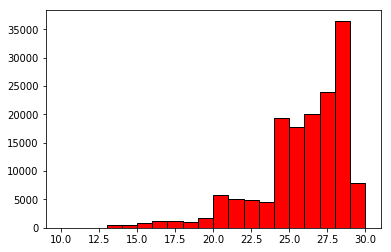

In [59]:
plt.hist(scaled_data.ravel(),bins=20, range=(10,30), facecolor='red', edgecolor='black')

In [ ]:
ax.set_title('hello')

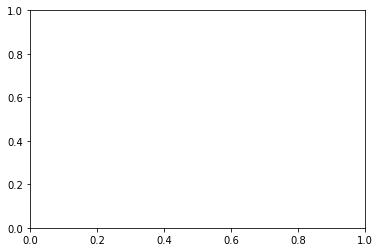

In [65]:
fig, ax = plt.subplots(1,1)

In [73]:
ax.hist(scaled_data.ravel(),bins=20, range=(10,30), facecolor='red', edgecolor='black')

(array([  0.00000000e+00,   0.00000000e+00,   1.00000000e+01,
          4.77000000e+02,   5.76000000e+02,   9.02000000e+02,
          1.13200000e+03,   1.25400000e+03,   1.03900000e+03,
          1.79800000e+03,   5.70400000e+03,   5.04200000e+03,
          4.84000000e+03,   4.56900000e+03,   1.92860000e+04,
          1.77860000e+04,   2.00280000e+04,   2.39410000e+04,
          3.64890000e+04,   7.97100000e+03]),
 array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,
         21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.]),
 <a list of 20 Patch objects>)

In [74]:
ax.set_xlabel('Temperature (Celsius)')

Text(0.5,17.2,'Temperature (Celsius)')

In [75]:
ax.set_ylabel('Number of image cells')

Text(3.2,0.5,'Number of image cells')

ax.set_title('Distribution of Sea Surface Temperatures across the image')

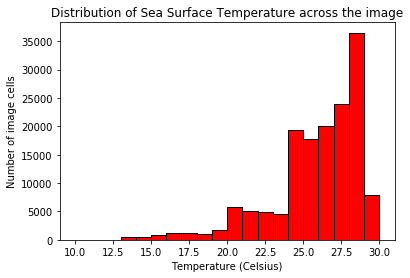

In [78]:
display(fig)